# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# Data Loading

In [2]:
df_train = pd.read_csv("/kaggle/input/synthetic-vietnamese-students-feedback-corpus/synthetic_train.csv")

In [3]:
df_train

,sentence,sentiment,topic
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,negative,facility
1,The university's musical and artistic faciliti...,neutral,facility
2,Phương pháp giảng dạy phù hợp với các đối tượn...,neutral,curriculum
3,Chương trình học giúp tôi trở thành một chuyên...,positive,curriculum
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,neutral,curriculum
...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,neutral,facility
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,neutral,others
8141,Anh/chị đã trở thành một người bạn đồng hành v...,positive,others
8142,Chương trình học phù hợp với nhu cầu của các n...,neutral,curriculum


---
# Data Analysing

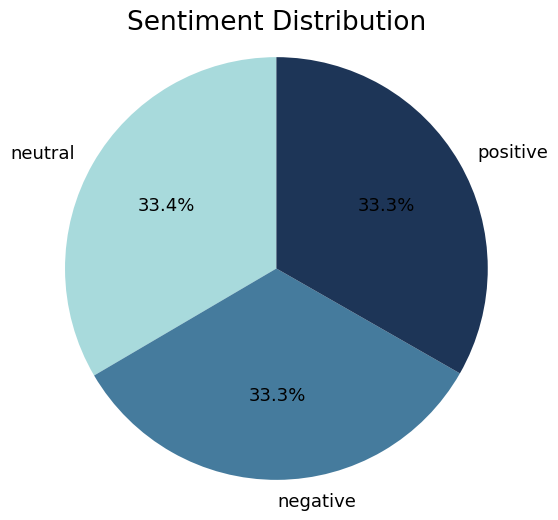

In [4]:
sentiment_counts = df_train['sentiment'].value_counts()

sentiments = sentiment_counts.index.tolist()
counts = sentiment_counts.values.tolist()
colors = ['#A8DADC', '#457B9D', '#1D3557']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=sentiments, colors = colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 13})
plt.title('Sentiment Distribution', fontsize=19)
plt.axis('equal')
plt.show()

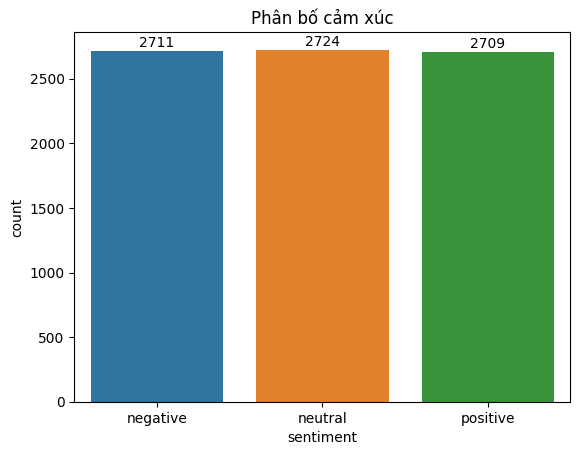

In [5]:
# Vẽ biểu đồ
ax = sns.countplot(data=df_train, x='sentiment')
plt.title("Phân bố cảm xúc")

# Thêm giá trị số trên mỗi cột
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [6]:
# Đếm số ký tự
df_train['char_count'] = df_train['sentence'].apply(len)

# Đếm số từ (chia theo dấu cách)
df_train['word_count'] = df_train['sentence'].apply(lambda x: len(x.split()))

df_train


,sentence,sentiment,topic,char_count,word_count
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,negative,facility,86,19
1,The university's musical and artistic faciliti...,neutral,facility,63,8
2,Phương pháp giảng dạy phù hợp với các đối tượn...,neutral,curriculum,68,14
3,Chương trình học giúp tôi trở thành một chuyên...,positive,curriculum,75,15
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,neutral,curriculum,142,34
...,...,...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,neutral,facility,71,16
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,neutral,others,47,12
8141,Anh/chị đã trở thành một người bạn đồng hành v...,positive,others,83,17
8142,Chương trình học phù hợp với nhu cầu của các n...,neutral,curriculum,56,12


In [7]:
print("Số từ trung bình:", df_train['word_count'].mean())
print("Số ký tự trung bình:", df_train['char_count'].mean())

print("Tối đa từ:", df_train['word_count'].max())
print("Tối thiểu từ:", df_train['word_count'].min())


Số từ trung bình: 15.549729862475441
Số ký tự trung bình: 70.78622298624754
Tối đa từ: 43
Tối thiểu từ: 3


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


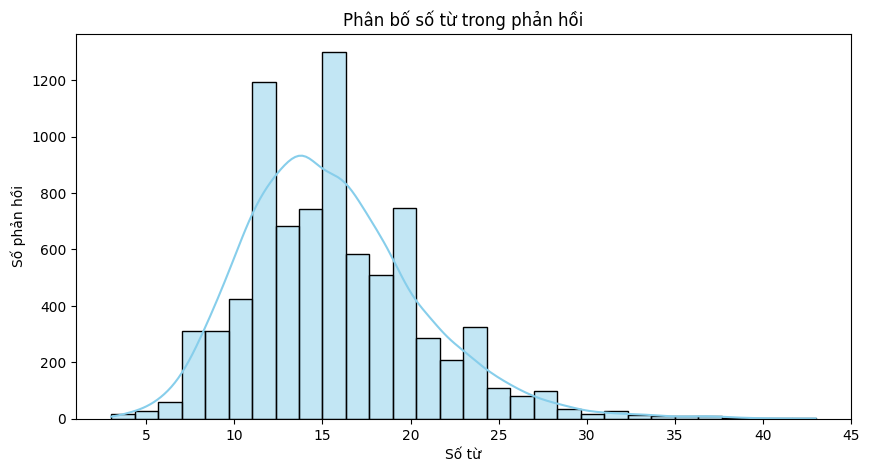

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


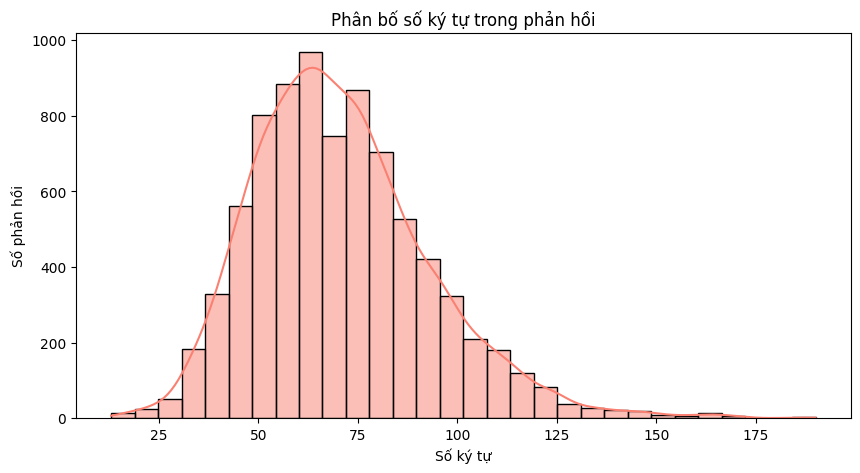

In [8]:
# Phân bố số từ
plt.figure(figsize=(10, 5))
sns.histplot(df_train['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Phân bố số từ trong phản hồi")
plt.xlabel("Số từ")
plt.ylabel("Số phản hồi")
plt.show()

# Phân bố số ký tự
plt.figure(figsize=(10, 5))
sns.histplot(df_train['char_count'], bins=30, kde=True, color='salmon')
plt.title("Phân bố số ký tự trong phản hồi")
plt.xlabel("Số ký tự")
plt.ylabel("Số phản hồi")
plt.show()


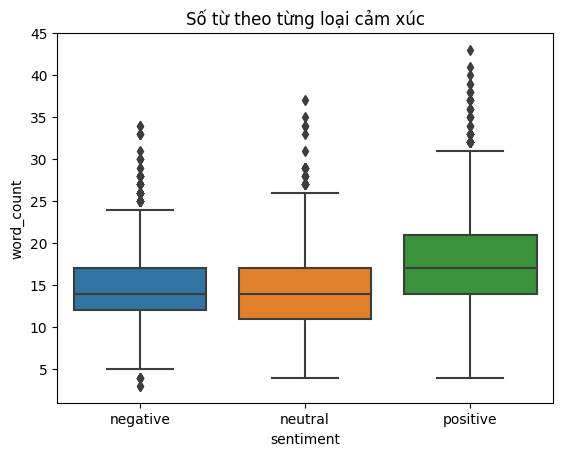

In [9]:
sns.boxplot(data=df_train, x='sentiment', y='word_count')
plt.title("Số từ theo từng loại cảm xúc")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Nếu chưa tải stopwords, tải về trước
nltk.download('stopwords')

# Giả sử bạn đã có một DataFrame 'df' với 2 cột: 'sentence' và 'sentiment'
# 'sentiment' có thể có các giá trị như: 'positive', 'neutral', 'negative'

# Tạo từ điển stopwords
stop_words = set(stopwords.words('english'))  # Nếu dữ liệu tiếng Việt, cần dùng stop words tiếng Việt

# Tiền xử lý văn bản: Loại bỏ stopwords và chữ hoa
def preprocess_text(text):
    text = text.lower()  # chuyển thành chữ thường
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Áp dụng tiền xử lý
df_train['clean_sentence'] = df_train['sentence'].apply(preprocess_text)

# Chia dữ liệu theo cảm xúc
positive_texts = df_train[df_train['sentiment'] == 'positive']['clean_sentence']
neutral_texts = df_train[df_train['sentiment'] == 'neutral']['clean_sentence']
negative_texts = df_train[df_train['sentiment'] == 'negative']['clean_sentence']

# Hàm tính tần suất từ sử dụng TfidfVectorizer
def get_top_n_words(texts, n=10):
    vectorizer = TfidfVectorizer(max_features=1000)  # Lấy 1000 từ phổ biến nhất
    X = vectorizer.fit_transform(texts)
    feature_names = np.array(vectorizer.get_feature_names_out())
    scores = np.array(X.sum(axis=0)).flatten()  # Tính tổng tần suất từ
    word_freq = dict(zip(feature_names, scores))  # Tạo từ điển từ -> tần suất
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)  # Sắp xếp giảm dần
    return sorted_word_freq[:n]  # Lấy n từ xuất hiện nhiều nhất

# Tính từ xuất hiện nhiều nhất trong từng nhóm cảm xúc
print("Top từ trong nhóm Positive:")
positive_top_words = get_top_n_words(positive_texts, n=10)
print(positive_top_words)

print("\nTop từ trong nhóm Neutral:")
neutral_top_words = get_top_n_words(neutral_texts, n=10)
print(neutral_top_words)

print("\nTop từ trong nhóm Negative:")
negative_top_words = get_top_n_words(negative_texts, n=10)
print(negative_top_words)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top từ trong nhóm Positive:
[('và', 176.14878532378992), ('học', 165.4882319294197), ('rất', 149.37838280519304), ('viên', 145.81048061454462), ('tôi', 130.00065823765104), ('của', 118.04803698119952), ('sinh', 109.21427158262362), ('có', 104.39406943242915), ('giúp', 100.87411038879091), ('các', 100.86881756892707)]

Top từ trong nhóm Neutral:
[('và', 156.1734581262102), ('viên', 151.18027611756932), ('rất', 123.99129705149645), ('học', 122.09710261957856), ('giảng', 116.50474842375036), ('sinh', 107.7805434321435), ('có', 104.54339143622867), ('của', 92.06604308810489), ('các', 83.91800845674581), ('tôi', 73.01061515327812)]

Top từ trong nhóm Negative:
[('không', 177.3434240349088), ('viên', 168.05280803083664), ('học', 139.36200040704705), ('và', 128.87070258646548), ('giảng', 118.98675558379207), ('của', 116.15206769237145), ('sinh', 113.13229735683413), ('này', 100.78636005968424), ('có', 93.99230553067197), ('quá', 85.25697763702007)]
